# Estimation & Logic of NHST


This lab / homework is about estimation and understanding the logic of null hypothesis significance testing. You will work with these concepts in this Notebook. 

## Assignment Goals

 - Develop familiarity with the estimation of population parameters (which builds on what you learned about sampling distributions and probability).
 - Understand the basic logic of how we test hypotheses, based on the estimations we make within a sample, including building a probability distribution of a statistic.

First, you will practice estimating population parameters from a dataset and build the sampling distribution of a statistical parameter using Bootstrap re-sampling. As always, visualizions will be included. You will then do some informal hypothesis testing. 




#  
  
## Estimation and Precision


In this lab, we will start by estimating some population parameters. We will begin by loading a dataset. This week we will be looking at the breakfast cereals database (https://www.kaggle.com/datasets/crawford/80-cereals). This dataset uses American labeling, so the nutrition info may not match the info in your home cupboard, as American law about nutrition info labeling is different to Canadian law.

The following fields are in the dataset:

Name: Name of cereal
- mfr: Manufacturer of cereal
  - A = American Home Food Products;
  - G = General Mills
  - K = Kelloggs
  - N = Nabisco
  - P = Post
  - Q = Quaker Oats
  - R = Ralston Purina
- type:
  - C = cold
  - H = hot
- calories: calories per serving
- protein: grams of protein
- fat: grams of fat
- sodium: milligrams of sodium
- fiber: grams of dietary fiber
- carbo: grams of complex carbohydrates
- sugars: grams of sugars
- potass: milligrams of potassium
- vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
- shelf: display shelf (1, 2, or 3, counting from the floor)
- weight: weight in grams of one serving
- cups: number of US cups in one serving
- rating: a rating of the cereal (possibly from Consumer Reports)


For the purposes of the lab, we will treat the full dataset as a population (even though it might not fully represent all the cereals on the grocery store shelves where you shop). Later we will take a sample from it.

Start by loading the dataset ('cereal.csv') and calculating some basic statistics on the whole dataset. These statistics will be our population parameters. To ensure that the data loads when we ask it to, please make sure that your dataset is in the same folder as this Jupyter Notebook on your harddrive. 

We will be using a new library this week. It's called Pandas. Pandas gives us the functionality to work with existing data in what is called a "data frame" (a set of data). We will import it with the rest of our import statements, under the nickname 'pd'.


In [17]:
# This is the block of import statements
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Start by importing the data. The command for doing this is below. We will import the data from the csv file into a pandas dataframe that we will call 'df' for short. To check that we've imported properly, we'll print out the 'header' of the data frame (the top row of the data frame with the variable names), along with the first 5 rows of data (this will help you get a sense for what the dataset looks like). After that, we will calculate the mean, and standard deviation of 'calories' and plot a histogram of this variable.

In [18]:
# Load the data set
df = pd.read_csv('cereal.csv')
print(df.head())

print(f'\nThere are {len(df)} cereals in the dataset.')

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3      30  0.33  68.402973  
1    8.0       8     135         0      3      30  1.00  33.983679  
2    7.0       5     320        25      3      30  0.33  59.425505  
3    8.0       0     330        25      3      30  0.50  93.704912  
4   14.0       8       0        25      3      30  0.75  34.384843  

There are 77 cereals in the dataset.


On average, the cereals contain 107.5325 calories per serving (sd = 19.9451).


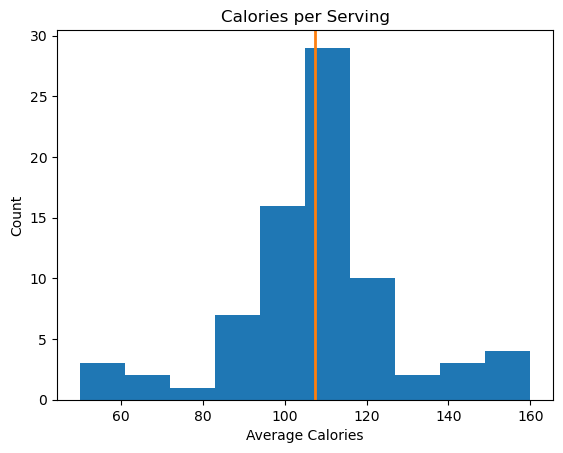

In [19]:
# Calculate the mean and standard deviation of the population variable, calories

mu_cals = np.mean(df['calories'])
sigma_cals = np.std(df['calories'])
print(f'On average, the cereals contain {mu_cals:.4f} calories per serving (sd = {sigma_cals:.4f}).')

# plot the histogram (add a vertical line to the plot to show where the mean is)

plt.hist(df['calories'])
plt.title('Calories per Serving')
plt.ylabel('Count')
plt.xlabel('Average Calories')
plt.axvline(mu_cals, color='tab:orange', linewidth=2)
plt.show()

Let's make a new variable in the dataset. Calculate the number of calories per US cup and save it as a new variable in your dataframe.

In [20]:
# Calculate number of calories are in 1 US cup of the cereal and write this to a new variable 
# called 'calories_per_cup'. Print out the header of the dataset to check that your calculation worked.

df['calories_per_cup'] = df['calories'] / df['cups']

print(df.head())


                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  \
0    5.0       6     280        25      3      30  0.33  68.402973   
1    8.0       8     135         0      3      30  1.00  33.983679   
2    7.0       5     320        25      3      30  0.33  59.425505   
3    8.0       0     330        25      3      30  0.50  93.704912   
4   14.0       8       0        25      3      30  0.75  34.384843   

   calories_per_cup  
0        212.121212  
1        120.000000  
2        212.121212  
3        1

On average, the cereals contain 145.4312 calories per cup (sd = 62.4003).


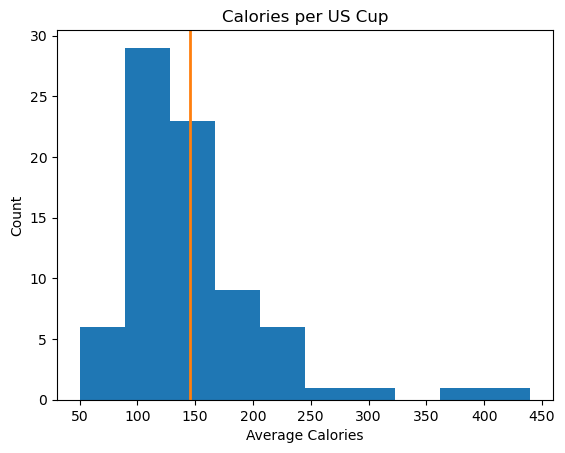

The most calorie-dense cereal is: Grape-Nuts
The least calorie-dense cereal is: Puffed Rice


In [21]:
# What is the average calories per cup? The standard deviation? Plot a histogram of your new variable

mu_calscup = np.mean(df['calories_per_cup'])
sigma_calscup = np.std(df['calories_per_cup'])
print(f'On average, the cereals contain {mu_calscup:.4f} calories per cup (sd = {sigma_calscup:.4f}).')

# plot the histogram (add a vertical line to the plot to show where the mean is)

plt.hist(df['calories_per_cup'])
plt.title('Calories per US Cup')
plt.ylabel('Count')
plt.xlabel('Average Calories')
plt.axvline(mu_calscup, color='tab:orange', linewidth=2)
plt.show()

# Which cereal is the most calorie-dense (most calories per cup)?
# Which cereal is the least calorie-dense (least calories per cup)?
print(f'The most calorie-dense cereal is: {df["name"].loc[df["calories_per_cup"] == max(df["calories_per_cup"])].values[0]}')
print(f'The least calorie-dense cereal is: {df["name"].loc[df["calories_per_cup"] == min(df["calories_per_cup"])].values[0]}')

Now we know what the population of cereals looks like in terms of calories and calories per cup. Next, let's take a single sample of 20, randomly selected cereals (without replacement) and save it to a new variable, 'target_sample'. Here is how we do that.

In [12]:
# Get a sample of n=20 cereals from the population. Sample randomly **without** replacement.
# Save the sample to a new variable called 'target_sample'

target_sample = df.sample(20, ignore_index=True)
print(target_sample.head())

                        name mfr type  calories  protein  fat  sodium  fiber  \
0          100% Natural Bran   Q    C       120        3    5      15    2.0   
1                 Grape-Nuts   P    C       110        3    0     170    3.0   
2                Corn Flakes   K    C       100        2    0     290    1.0   
3                  Corn Pops   K    C       110        1    0      90    1.0   
4  Nutri-Grain Almond-Raisin   K    C       140        3    2     220    3.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  \
0    8.0       8     135         0      3      30  1.00  33.983679   
1   17.0       3      90        25      3      30  0.25  53.371007   
2   21.0       2      35        25      1      30  1.00  45.863324   
3   13.0      12      20        25      2      30  1.00  35.782791   
4   21.0       7     130        25      3      40  0.67  40.692320   

   calories_per_cup  
0        120.000000  
1        440.000000  
2        100.000000  
3        1

As usual, we will calculate the mean and standard deviation and plot a histogram of the 'calories' variable. In the code cell below, do those calculations and print the results. In addition, create a histogram of the sample data. Hint: you can copy and paste the code from above and change the dataframe name 'df' to 'target_sample'. Change the variable names to reflect that they come from the sample also. Do not forget to use ddof=1 to correct the standard deviation when you do the calculation.

How close is our sample to the population? Does your sample under or over estimate the population parameter? Look at the printed variables and the histogram above to find out. 

On average, the cereals contain 106.0000 calories per serving (sd = 22.8035).


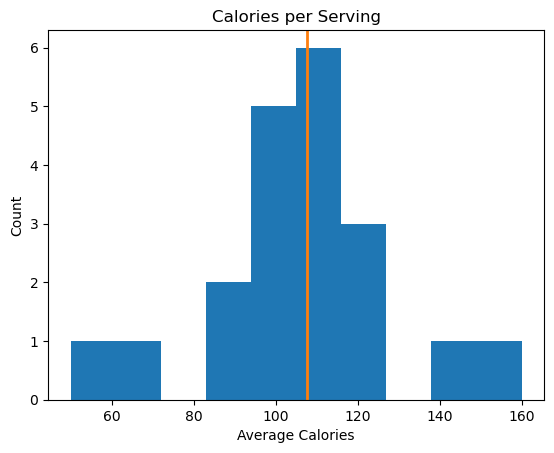

In [13]:
# Calculate/print the mean and standard deviation of the SAMPLE variable, 'calories'
mean_cals = np.mean(target_sample['calories'])
sd_cals = np.std(target_sample['calories'], ddof=1)
print(f'On average, the cereals contain {mean_cals:.4f} calories per serving (sd = {sd_cals:.4f}).')

# Plot the histogram (add a vertical line to the plot to show where the population mean is and a vertical line in 
# a different colour for the sample mean)

plt.hist(target_sample['calories'])
plt.title('Calories per Serving')
plt.ylabel('Count')
plt.xlabel('Average Calories')
plt.axvline(mu_cals, color='tab:orange', linewidth=2)
plt.show()

## Bootstrap

Now we want to take our target_sample and see how representative it is of the population. It is likely to be reasonably representative because you generated a random sample of games when you created the target sample. We will make the comparison that using bootstrap resampling to get a sampling distribution of sample means. Below we will write a bootstrap function (that samples with replacement - an important element in bootstrapping). 

The first thing to do is to review the steps that we would need to do to conduct a bootstrap analysis on the target_sample. Here, we are going to compare the means of the samples. That means that we are going to use bootstrapping to make a DOSM.

#### Bootstrap steps 

1. Select the sample size (hint: in bootstrapping, the bootstrapped sample size will be the same as the size of the original sample).

2. Select the number of bootstrap re-samples you will take.

4. Take a sample WITH REPLACEMENT.

5. Compute and store the sample mean (we are using the mean because we want to build a DOSM).

6. Repeat steps 4 & 5 lots of times (once for each sample).

7. Plot a histogram of the sample means.

Let's get started by making the bootstrap function we need. (Be sure that in the next cell block you remember that the function needs to be called once it is initialized.) 

In [8]:
# Bootstrap function here!
def my_bootstrap(data, sample_size, num_iterations):
    dosm_boot = np.empty(num_iterations)
    for i in range(num_iterations):
        sample = data.sample(sample_size, replace=True, ignore_index=True) # Here replacement is set to 'True'.
        dosm_boot[i] = np.mean(sample)
    return dosm_boot

Next, we will 'call' the function and set its output to a new variable. 

In [14]:
# Produce the DOSM from your target sample (we will use the 'calories' variable) with a function call 
# and calculate/print its mean and standard deviation. Use 2000 samples as your 'num_iterations'.

my_dosm = my_bootstrap(target_sample['calories'], len(target_sample), 2000)
dosm_mean = np.mean(my_dosm)
dosm_sd = np.std(my_dosm)

print(f'The mean of the DOSM is {dosm_mean:.4f}, sd = {dosm_sd:.4f}')

The mean of the DOSM is 105.8962, sd = 5.0610


Next, we will make a histogram of the DOSM and compare the mean of the sample with the original population mean. Be sure that your histogram is correctly labeled and that you plot a vertical line at the population mean on the plot. We will also plot the population mean as a line on the plot for comparison. 

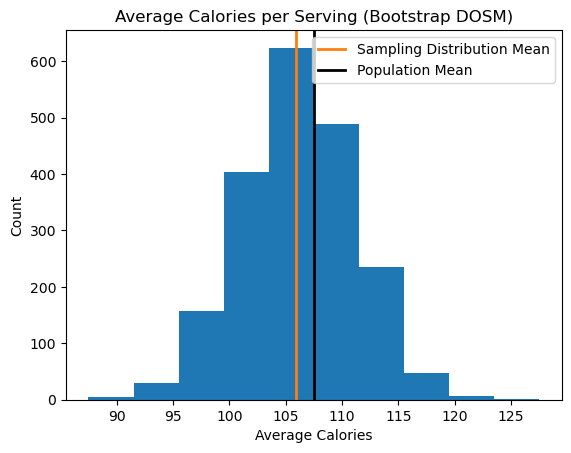

In [24]:
# plot the histogram here.
plt.hist(my_dosm)
plt.title('Average Calories per Serving (Bootstrap DOSM)')
plt.ylabel('Count')
plt.xlabel('Average Calories')
plt.axvline(dosm_mean, color='tab:orange', linewidth=2, label='Sampling Distribution Mean')
plt.axvline(mu_cals, color='black', linewidth=2, label='Population Mean')
plt.legend()
plt.show()


What are your observations? How close is your sampling distribution's mean to the original population mean? Is your sample a good model of (representative of) the population? Why or why not?

The next thing to do is to compute and plot the 95%CI for your distribution of sample means. Because we used a bootstrapping anlaysis to empirically build the DOSM, we will use an empirical model of building the 95%CI (rather than the theoretical/analytical computation). 

To find the CI for the DOSM you created, here is what you need to do:

1) Choose the level of confidence you wish to use. In this exmaple, we will use a 95%CI. Remember from lecture that we will split that error evenly between the top and bottom portions of the distribution of sample means. 

2) Select the percentiles of the distribution where the lower and upper boundaries of your confidence interval will lie. To do that, you take the margin of error (5%) and divide it by 2 (here, 5%/2 = 2.5%). So, our 95%CI will have a range that includes the middle 95% of the distribution. The lower boundary is the lowest percentile (0%) + half the margin of error (2.5%). The upper boundary is the highest percentile (100%) - half the margin of error (2.5%). That places our lower boundary at the 2.5th percentile and the upper boundary at the 97.5th percentile of the DOSM. 

3) Find the values of the DOSM that correspond to the upper and lower boundaries. That sounds hard, but there is a numpy function that will do that relatively easily. Learn how to use it by following what happens in the code below. 

Once we have calculated the upper and lower boundaries, we will plot them on the distribution (as we did above). 

In [25]:
# Calculate the upper and lower boundaries of the DOSM you created and print them.

low_bound = np.percentile(my_dosm, 2.5)
upper_bound = np.percentile(my_dosm, 97.5)

print(f'The 95%CI is: [{low_bound:.2f}, {upper_bound:.2f}]')

The 95%CI is: [96.00, 115.50]


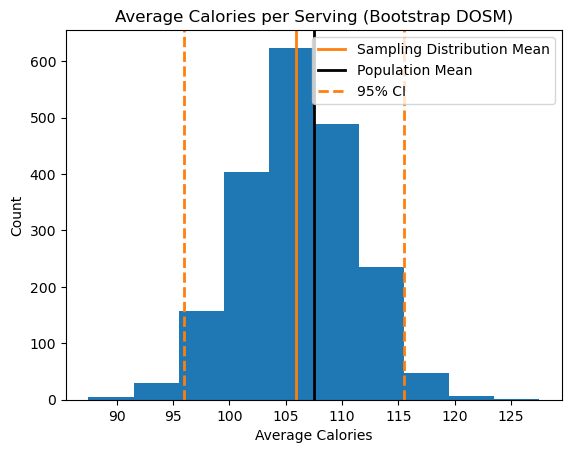

In [29]:
# Now plot them on a histogram of your DOSM. 

plt.hist(my_dosm)
plt.title('Average Calories per Serving (Bootstrap DOSM)')
plt.ylabel('Count')
plt.xlabel('Average Calories')
plt.axvline(dosm_mean, color='tab:orange', linewidth=2, label='Sampling Distribution Mean')
plt.axvline(mu_cals, color='black', linewidth=2, label='Population Mean')
plt.axvline(low_bound, color ='tab:orange', linewidth=2, linestyle='dashed', label='95% CI')
plt.axvline(upper_bound, color ='tab:orange', linewidth=2, linestyle='dashed')
plt.legend()
plt.show()

## <font color="blue"> *Homework Problem 1*</font>

Using the technique we used above, I have generated a new random sample from this same dataset. The sample contains a new random selection of 20 cereals from the original dataset. The data are contained in a dataset called 'cereals_sampled.csv' (please make sure that it is in the same folder as this Jupyter Notebook on your hard-drive for easy loading). Please use this file so that you get the right answers in the next section. In the code cells below, you will use the processes we have outlined above to build a sampling distribution of sample means for the variable 'calories_per_cup'. You will then derive the **99%CI** for the distribution and plot this on the histogram just as we did above. 

The steps are as follows (do them in the indicated code/markdown cells below):

1) Load the dataset. Call your new dataframe 'df_sample' to avoid over-writing the work you did above (which you will need later).

2) Calculate (and print) the mean and standard deviation of 'calories_per_cup'. Note, this variable has been calculated for you in the sampled dataset.

3) Plot a histogram of calories_per_cup. Be sure that it is appropriately labeled.

4) Look at the histogram and determine whether it is normally distributed or, if not, how the distribution is shaped and whether you expect that the DOSM will be normally distributed.

5) Produce a DOSM of calories_per_cup using the same bootstrap function you wrote above (please ensure that you call the function, rather than re-writing it). 

6) Calculate & print the mean and standard deviation of the calories_per_cup DOSM.

7) Calculate & print the upper and lower bounds for a 99% confidence interval on your away-fouls DOSM.

8) Plot the histogram of the away-fouls DOSM. Add vertical lines to show: the calories_per_cup DOSM mean; the upper and lower bound of your 99%CI; and the average calories_per_cup in the population.

9) Does the population mean fall within your 99% CI? Why or why not?

In [36]:
# 1.1) Load the data set (be sure to check what you have loaded with print commands)

df_sample = pd.read_csv('cereals_sampled.csv')
print(df_sample.head())

print(f'\nThere are {len(df_sample)} cereals in the dataset.')

                    name mfr type  calories  protein  fat  sodium  fiber  \
0         Almond Delight   R    C       110        2    2     200    1.0   
1  Cinnamon Toast Crunch   G    C       120        1    3     210    0.0   
2            Cocoa Puffs   G    C       110        1    1     180    0.0   
3     Cracklin' Oat Bran   K    C       110        3    3     140    4.0   
4                Crispix   K    C       110        2    0     220    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  \
0   14.0       8       0        25      3      30  0.75  34.384843   
1   13.0       9      45        25      2      30  0.75  19.823573   
2   12.0      13      55        25      2      30  1.00  22.736446   
3   10.0       7     160        25      3      30  0.50  40.448772   
4   21.0       3      30        25      3      30  1.00  46.895644   

   calories_per_cup  
0        146.666667  
1        160.000000  
2        110.000000  
3        220.000000  
4        110

In [ ]:
# 1.2) Calculate and print the mean and SD of 'calories_per_cup'

mu_per_cup = np.mean(df_sample['calories_per_cup'])
sigma_per_cup = np.std(df_sample['calories_per_cup'])
print(f'On average, the cereals contain {mu_per_cup:.2f} calories per cup (sd = {sigma_per_cup:.2f}).')

On average, the cereals contain 138.3281 calories per cup (sd = 41.3719).


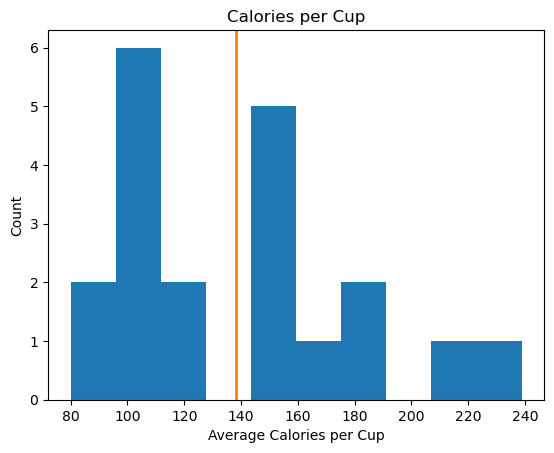

In [ ]:
# 1.3) Plot the histogram (if you wish, add a vertical line to the plot to show where the mean is)

plt.hist(df_sample['calories_per_cup'])
plt.title('Calories per Cup')
plt.ylabel('Count')
plt.xlabel('Average Calories per Cup')
plt.axvline(mu_per_cup, color='tab:orange', linewidth=2)
plt.show()

### <font color="blue"> *1.4) Answer the following questions in the markdown cell below.*</font>

1) Is calories_per_cup in this sample of cereals normally distributed? If not, how the distribution is shaped? 

2) Would you expect a DOSM of this variable to be normally distributed?

1. calories_per_cup is not normally distributed in this sample of cereals. The distribution is right-skewed, as the amount of values peaks on the left side, with a tail on the right side.
2. I would expect a DOSM of this variable to be normally distributed, because when many samples are taken (with replacement), the closer a distribution appears to be normal. 


In [ ]:
# 1.5) Produce a DOSM for calories_per_cup from this sample by calling the bootstrap function you wrote above. 
# Use 5000 as the number of iterations.

my_dosm_per_cup = my_bootstrap(df_sample['calories_per_cup'], len(df_sample), 5000)

# 1.6) Calculate and print the mean and standard deviation of your new DOSM.

dosm_per_cup_mean = np.mean(my_dosm_per_cup)
dosm_per_cup_sd = np.std(my_dosm_per_cup)
print(f'The mean of the DOSM is {dosm_per_cup_mean:.4f}, sd = {dosm_per_cup_sd:.4f}')

The mean of the DOSM is 138.3319, sd = 9.1518


In [ ]:
# 1.7) Calculate the upper and lower boundaries of the 99%CI for DOSM you created and print them.

low_bound_per_cup = np.percentile(my_dosm_per_cup, 0.5)
upper_bound_per_cup = np.percentile(my_dosm_per_cup, 99.5)

print(f'The 99%CI is: [{low_bound_per_cup:.2f}, {upper_bound_per_cup:.2f}]')

The 99%CI is: [115.82, 163.87]


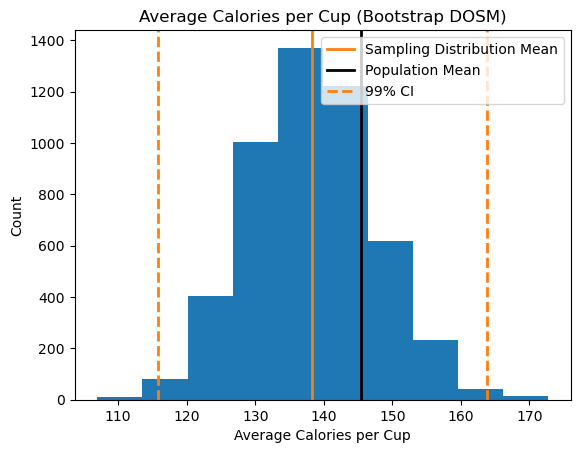

In [ ]:
# 1.8) Plot a histogram of your new DOSM here. Add vertical lines to show the following elements:
#     1) the mean of your calories_per_cup DOSM
#     2) the lower and upper bound of your confidence interval for this DOSM
#     3) the average number of calories_per_cup in the full dataset (you calculated this in the lab already)

plt.hist(my_dosm_per_cup)
plt.title('Average Calories per Cup (Bootstrap DOSM)')
plt.ylabel('Count')
plt.xlabel('Average Calories per Cup')
plt.axvline(dosm_per_cup_mean, color='tab:orange', linewidth=2, label='Sampling Distribution Mean')
plt.axvline(mu_calscup, color='black', linewidth=2, label='Population Mean')
plt.axvline(low_bound_per_cup, color ='tab:orange', linewidth=2, linestyle='dashed', label='99% CI')
plt.axvline(upper_bound_per_cup, color ='tab:orange', linewidth=2, linestyle='dashed')
plt.legend()
plt.show()

### <font color="blue"> *1.9) Answer the following questions in the markdown cell below.*</font>


1) Does the population mean fall within the confidence interval you calculated?

2) Why or why not?

1. Yes, the population mean falls within the confidence interval I calculated. The population mean is about 145, and the lower bound is about 115 with the upper bound being about 164. The population mean falls within the lower and upper bounds.
2. It is within the confidence interval, because 99%CI encapsulates the majority of the dataset, meaning there are wide boundaries for error in comparing the population mean to the sample mean. Only 1% of the dataset is not within the CI.



# 

   
   
   
   
# NHST Logic and Basics!

The bank manager experiment has been repeated and modernized. In this lab, we will conduct a randomization test to test whether there is gender discrimination amongst bank managers in 2022 (when these data were collected). We will use an updated dataset, which is similar to the one we previewed in class. Because the idea of randomization testing is difficult, using a smallish dataset with which you are already familiar should help you understand this process.

We will start by loading the dataset ('bank_managers_update.csv') and producing a contingency table. We will calculate the percentages of men and women who were promoted by these bank managers and will also use a stacked bar plot to show the data.

In [ ]:
# Load the data

df = pd.read_csv('bank_managers_update.csv')
print(df.head())

   ManagerID GenderOfName PromotionDecision
0          1          Man      Not Promoted
1          2          Man          Promoted
2          3          Man          Promoted
3          4          Man          Promoted
4          5          Man          Promoted


In [ ]:
# Produce the contingency table

tbl = pd.crosstab(index=df['GenderOfName'], columns=df['PromotionDecision'], rownames=['Gender of Candidate'],
                 colnames=['Promotion Decision'], margins=True, margins_name='Total')
display(tbl)


Promotion Decision,Not Promoted,Promoted,Total
Gender of Candidate,,,
Man,8,40,48
Woman,12,36,48
Total,20,76,96


In [ ]:
# Calculate the percentages of men and women who received promotions, and 
# the difference between them (how many more men were promoted than women)

prop_promoted_men = tbl.loc['Man'].values[1]/tbl.loc['Man'].values[2]
prop_promoted_women = tbl.loc['Woman'].values[1]/tbl.loc['Woman'].values[2]

man_woman_diff = prop_promoted_men - prop_promoted_women

# Print the relevant values

print(f'Proportion of men recommended for promotion: {prop_promoted_men:.4f}')
print(f'Proption of women recommended for promotion: {prop_promoted_women:.4f}')
print(f'Difference in promotion decisions (men - women): {man_woman_diff:.4f}')


Proportion of men recommended for promotion: 0.8333
Proption of women recommended for promotion: 0.7500
Difference in promotion decisions (men - women): 0.0833


Now we need to write a set of three functions that will allow us to perform our randomization test. 

1) The first function we need is one that will randomly shuffle the data in the 'GenderOfName' column of our dataframe and return the shuffled data. 

2) The second function we need is one that will calculate the contingency table on the shuffled data and return the difference in the proportions of men and women who received promotions (always subtracting in the same way as above: percent men who were promoted minus percent women who were promoted).

3) The third function we need is one that will repeat steps 1 and 2, some number of times, recording the outcomes in an array that we can use as our comparison distribution. 


In [ ]:
# Function to randomly shuffle data in the 'GenderOfName' column.

def column_shuffle(data):
    data['GenderOfName'] = data['GenderOfName'].sample(frac=1). reset_index(drop=True)
    return data

In [ ]:
# Function to get the contingency table, the proportions of men & women promoted, and the differences in promotion
# proportion. This time, we will take a shortcut with the table and use pandas' 'normalize='index'' parameter. 
# This will cause the table to display percents, instead of raw numbers and will allow us to skip the calculation
# of promotion proportion per gender.

def get_gender_diff(data):
    t = pd.crosstab(index=data['GenderOfName'], columns=data['PromotionDecision'], normalize='index')
    promoted_men = t.loc['Man'].values[1]
    promoted_women = t.loc['Woman'].values[1]
    return promoted_men - promoted_women


In [ ]:
# Check your output! What is the contingency table producing? Do the values look like the ones calculated above?

t = pd.crosstab(index=df['GenderOfName'], columns=df['PromotionDecision'], normalize='index')
display(t)

# What is get_gender_diff producing? Is this the same as above?

print(f'{get_gender_diff(df):.4f}')

PromotionDecision,Not Promoted,Promoted
GenderOfName,,
Man,0.166667,0.833333
Woman,0.250000,0.750000


0.0833


In [ ]:
# Now we need the randomization test function.

def randomization_test(data, num_iterations):
    distrib_of_promo_diffs = np.empty(num_iterations)
    for i in range(num_iterations):
        df_shuffle = column_shuffle(data) # This calls shuffle
        outcome = get_gender_diff(df_shuffle) # This calls get_gender_diffs
        distrib_of_promo_diffs[i] = outcome
    return distrib_of_promo_diffs

Finally, we will call the randomization test and examine the results. Use 1000 samples as your number of iterations. It will take your computer a few minutes to run this. That's ok!

In [ ]:
# Run the test!

promo_diffs = randomization_test(df.copy(), 1000)

Calculate the critical value for the test statistic, based on the distribution you obtained. Here, we will use alpha = .05 as our level of significance. The research hypothesis is that men will be favoured for promotions over women. This is a one-tailed hypothesis so we are looking for critical value where 95% of the distribution falls below that score. If our observed value is more extreme than this critical value, we will reject the null hypothesis, that men are not favoured for promotions by male bank managers.

In [ ]:
# Critical value

critical_value = np.percentile(promo_diffs, 95)
print(f'The critical value is: {critical_value:.4f}')

The critical value is: 0.1250


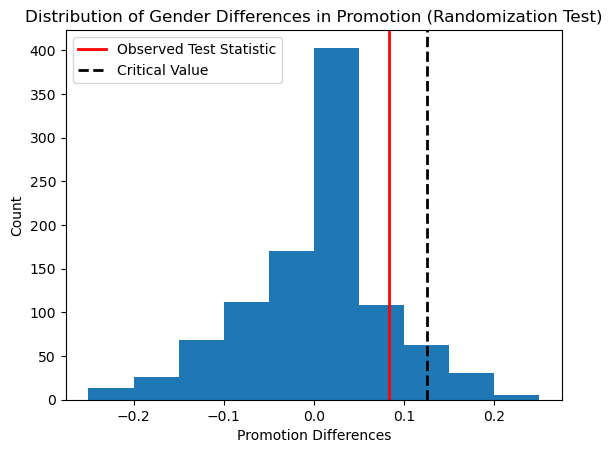

In [ ]:
# Plot a histogram of the distribution of the difference in promotion proportion that you obtained 
# in your randomization test. Include a vertical line that shows the test statistic that you obtained and 
# another that shows the critical value.

plt.hist(promo_diffs)
plt.title('Distribution of Gender Differences in Promotion (Randomization Test)')
plt.ylabel('Count')
plt.xlabel('Promotion Differences')
plt.axvline(man_woman_diff, color='Red', linewidth=2, label='Observed Test Statistic')
plt.axvline(critical_value, color='Black', linewidth=2, linestyle='dashed', label='Critical Value')
plt.legend()
plt.show()

## <font color="blue"> *Homework Problem 2*</font>

What do the results show? Should you reject the null hypothesis? Why or why not. Answer these questions in the markdown cell below.

The results show that it is less extreme than the critical value. Therefore, we should not reject H0. There does not appear to be a significant difference amongst male bank managers' likelihood to promote men vs women. This suggests that male bank managers promote women about as often as they promote men, on average.



## <font color="blue"> *Homework Problem 3*</font>

Read the statment below.

**"Rejecting the null hypothesis guarantees support for the research hypothesis."**

Is this statement true? Why or why not? Use the markdown cell below for your response.

The above statement is not true, because support for the research hypothesis can never be guaranteed by rejecting a null hypothesis. When the null hypothesis is rejected, it only means that there is a relationship between the variables. There is always a chance that there is a type I statistical error or a flaw in design, sampling procedure, or the theory being tested. These types of errors may ruin the validity of the results.

